# Merge, Preprocessing and Modeling

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import data

### drilling

In [2]:
drilling = pd.read_csv('../Data/drilling_data.csv')
drilling

,Date&Time,Bit depth (m),Total RPM,Hook height (m),Torque on bit (lbf.ft),Tension (klbf),Motor RPM,Mud flow (l/mn),SPP (psi),RPM top (rpm),Surface Torque (lbf.ft),ROP (m/h),WOB (klbf)
0,2018-09-07 04:51:55,3004.038,188.138,9.661,373.80034,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675
1,2018-09-07 04:52:00,3004.072,187.792,9.627,392.90055,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844
2,2018-09-07 04:52:05,3004.101,188.138,9.599,463.13509,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900
3,2018-09-07 04:52:10,3004.135,188.138,9.564,479.88368,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940
4,2018-09-07 04:52:15,3004.169,188.138,9.530,511.50416,158.599,128.138,985.680,3289.976,60.0,4860.051,21.423,4.013
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31925,2018-09-10 18:12:50,4354.642,248.874,3.762,583.03324,164.580,138.874,1068.264,4252.939,110.0,5284.055,12.377,5.992
31926,2018-09-10 18:12:55,4354.642,248.874,3.762,540.42066,164.874,138.874,1070.928,4239.285,110.0,5272.055,10.658,5.670
31927,2018-09-10 18:13:00,4354.642,249.394,3.762,484.88183,165.122,139.394,1067.820,4227.398,110.0,5083.386,8.939,5.330
31928,2018-09-10 18:13:05,4354.642,248.701,3.762,461.07838,165.353,138.701,1068.708,4219.808,110.0,4992.719,7.220,5.223


In [3]:
drilling.drop(["Date&Time"],axis=1,inplace=True)

In [4]:
drilling["Bit depth (m)"] = drilling["Bit depth (m)"].apply(lambda x: round(x,1))

In [5]:
drilling

,Bit depth (m),Total RPM,Hook height (m),Torque on bit (lbf.ft),Tension (klbf),Motor RPM,Mud flow (l/mn),SPP (psi),RPM top (rpm),Surface Torque (lbf.ft),ROP (m/h),WOB (klbf)
0,3004.0,188.138,9.661,373.80034,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675
1,3004.1,187.792,9.627,392.90055,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844
2,3004.1,188.138,9.599,463.13509,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900
3,3004.1,188.138,9.564,479.88368,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940
4,3004.2,188.138,9.530,511.50416,158.599,128.138,985.680,3289.976,60.0,4860.051,21.423,4.013
...,...,...,...,...,...,...,...,...,...,...,...,...
31925,4354.6,248.874,3.762,583.03324,164.580,138.874,1068.264,4252.939,110.0,5284.055,12.377,5.992
31926,4354.6,248.874,3.762,540.42066,164.874,138.874,1070.928,4239.285,110.0,5272.055,10.658,5.670
31927,4354.6,249.394,3.762,484.88183,165.122,139.394,1067.820,4227.398,110.0,5083.386,8.939,5.330
31928,4354.6,248.701,3.762,461.07838,165.353,138.701,1068.708,4219.808,110.0,4992.719,7.220,5.223


### Calculate Mechanical Specific Energy (MSE)

In [6]:
import math

bit_size = 6.75
Ab = math.pi*(bit_size)**2

In [7]:
#drilling["MSE (psi)"] = (drilling["WOB (klbf)"]*1000/Ab)
#+(2*math.pi*drilling["Total RPM"]*drilling["Torque on bit (lbf.ft)"]/(Ab*drilling["ROP (m/h)"]*3.28084))

drilling

,Bit depth (m),Total RPM,Hook height (m),Torque on bit (lbf.ft),Tension (klbf),Motor RPM,Mud flow (l/mn),SPP (psi),RPM top (rpm),Surface Torque (lbf.ft),ROP (m/h),WOB (klbf)
0,3004.0,188.138,9.661,373.80034,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675
1,3004.1,187.792,9.627,392.90055,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844
2,3004.1,188.138,9.599,463.13509,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900
3,3004.1,188.138,9.564,479.88368,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940
4,3004.2,188.138,9.530,511.50416,158.599,128.138,985.680,3289.976,60.0,4860.051,21.423,4.013
...,...,...,...,...,...,...,...,...,...,...,...,...
31925,4354.6,248.874,3.762,583.03324,164.580,138.874,1068.264,4252.939,110.0,5284.055,12.377,5.992
31926,4354.6,248.874,3.762,540.42066,164.874,138.874,1070.928,4239.285,110.0,5272.055,10.658,5.670
31927,4354.6,249.394,3.762,484.88183,165.122,139.394,1067.820,4227.398,110.0,5083.386,8.939,5.330
31928,4354.6,248.701,3.762,461.07838,165.353,138.701,1068.708,4219.808,110.0,4992.719,7.220,5.223


In [8]:
drilling["DOC (mm)"] = ((drilling["ROP (m/h)"]*1000)/(drilling["Total RPM"]*60))

In [9]:
drilling["MSE (psi)"] = ((2*drilling["Torque on bit (lbf.ft)"])/(drilling["DOC (mm)"]*0.00328084*(bit_size/2)**2))

<AxesSubplot:>

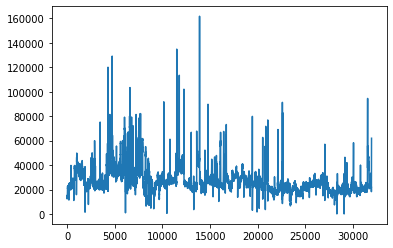

In [10]:
drilling["MSE (psi)"].plot()

In [11]:
drilling["DS (psi)"] = (drilling["WOB (klbf)"]*1000/(bit_size*drilling["DOC (mm)"]/(25.4*2)))

In [12]:
drilling

,Bit depth (m),Total RPM,Hook height (m),Torque on bit (lbf.ft),Tension (klbf),Motor RPM,Mud flow (l/mn),SPP (psi),RPM top (rpm),Surface Torque (lbf.ft),ROP (m/h),WOB (klbf),DOC (mm),MSE (psi),DS (psi)
0,3004.0,188.138,9.661,373.80034,158.899,128.138,985.680,3250.698,60.0,4496.047,17.971,3.675,1.592005,12565.871415,17372.919689
1,3004.1,187.792,9.627,392.90055,158.786,127.792,983.016,3260.523,60.0,4844.050,19.200,3.844,1.704013,12339.772011,16977.370536
2,3004.1,188.138,9.599,463.13509,158.745,128.138,985.680,3275.646,60.0,4712.049,20.086,3.900,1.779368,13929.623950,16495.248458
3,3004.1,188.138,9.564,479.88368,158.648,128.138,985.680,3280.648,60.0,4770.050,21.128,3.940,1.871676,13721.536836,15842.566779
4,3004.2,188.138,9.530,511.50416,158.599,128.138,985.680,3289.976,60.0,4860.051,21.423,4.013,1.897809,14424.276731,15913.898535
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31925,4354.6,248.874,3.762,583.03324,164.580,138.874,1068.264,4252.939,110.0,5284.055,12.377,5.992,0.828867,37644.895256,54406.041892
31926,4354.6,248.874,3.762,540.42066,164.874,138.874,1070.928,4239.285,110.0,5272.055,10.658,5.670,0.713748,40521.395748,59785.802184
31927,4354.6,249.394,3.762,484.88183,165.122,139.394,1067.820,4227.398,110.0,5083.386,8.939,5.330,0.597381,43439.179567,67148.368091
31928,4354.6,248.701,3.762,461.07838,165.353,138.701,1068.708,4219.808,110.0,4992.719,7.220,5.223,0.483847,50999.243385,81240.305828


## Load GR + Injectivity

In [13]:
feature = pd.read_excel('../Data/GR_injectivity.xlsx')
feature

,Depth MD (m),GR1AX(API),Depth MD (m).1,Depth corr,Apparent injectivity (liters/min)
0,544.4,0.0,1383.481138,1485.481138,23.85
1,544.6,0.0,1384.201534,1486.201534,23.85
2,544.8,0.0,1384.921930,1486.921930,-4.77
3,545.0,0.0,1385.642325,1487.642325,-4.77
4,545.2,0.0,1386.362721,1488.362721,-4.77
...,...,...,...,...,...
19044,4353.2,141.2,NaN,NaN,NaN
19045,4353.4,141.2,NaN,NaN,NaN
19046,4353.6,141.2,NaN,NaN,NaN
19047,4353.8,141.2,NaN,NaN,NaN


### Gamma Ray

In [14]:
GR = feature.drop(["Depth MD (m).1","Depth corr","Apparent injectivity (liters/min)"],axis=1)

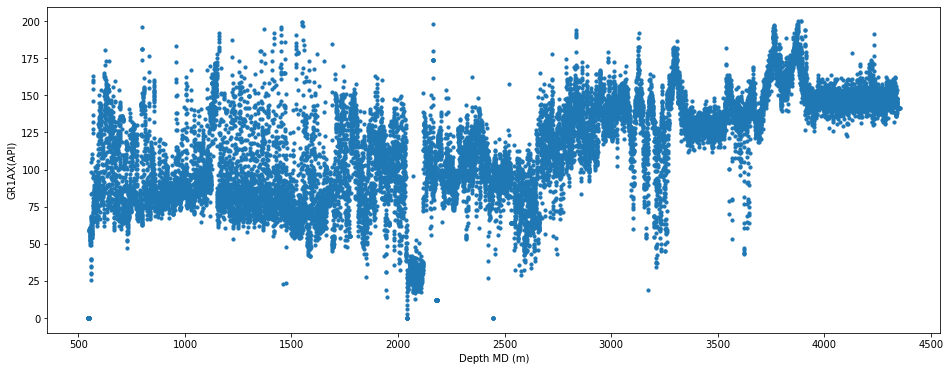

In [15]:
plt.figure(figsize=(16,6))
plt.scatter(GR["Depth MD (m)"],GR["GR1AX(API)"],s=10)
plt.xlabel('Depth MD (m)')
plt.ylabel('GR1AX(API)')
plt.show()

The interesting part is the horizontal drain

In [16]:
GR = GR[GR["Depth MD (m)"]>3004]

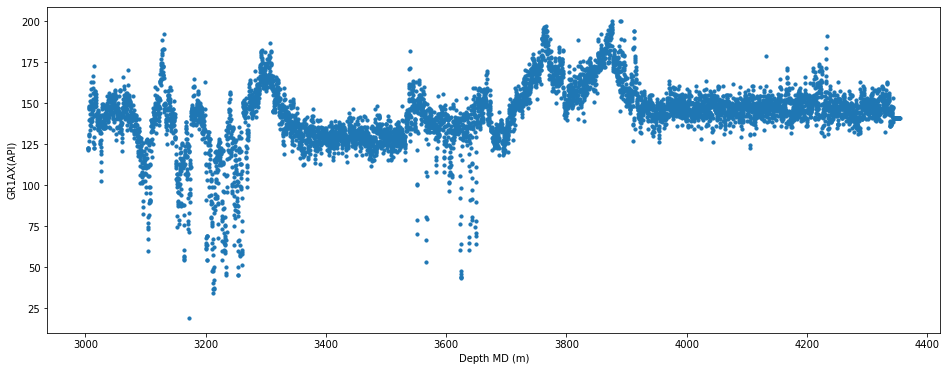

In [17]:
plt.figure(figsize=(16,6))
plt.scatter(GR["Depth MD (m)"],GR["GR1AX(API)"],s=10)
plt.xlabel('Depth MD (m)')
plt.ylabel('GR1AX(API)')
plt.show()

In [18]:
GR.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6750 entries, 12299 to 19048
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Depth MD (m)  6750 non-null   float64
 1   GR1AX(API)    6750 non-null   float64
dtypes: float64(2)
memory usage: 158.2 KB


In [19]:
GR

,Depth MD (m),GR1AX(API)
12299,3004.2,121.3
12300,3004.4,122.1
12301,3004.6,122.9
12302,3004.8,122.9
12303,3005.0,122.9
...,...,...
19044,4353.2,141.2
19045,4353.4,141.2
19046,4353.6,141.2
19047,4353.8,141.2


In [20]:
len(GR["Depth MD (m)"].unique())

6750

### Injectivity

In [21]:
injectivity = feature.drop(["Depth MD (m)","GR1AX(API)","Depth MD (m).1"],axis=1)
injectivity

,Depth corr,Apparent injectivity (liters/min)
0,1485.481138,23.85
1,1486.201534,23.85
2,1486.921930,-4.77
3,1487.642325,-4.77
4,1488.362721,-4.77
...,...,...
19044,NaN,NaN
19045,NaN,NaN
19046,NaN,NaN
19047,NaN,NaN


In [22]:
injectivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19049 entries, 0 to 19048
Data columns (total 2 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Depth corr                         4118 non-null   float64
 1   Apparent injectivity (liters/min)  4118 non-null   float64
dtypes: float64(2)
memory usage: 297.8 KB


In [23]:
injectivity.dropna(inplace=True)

In [24]:
injectivity = injectivity[injectivity["Depth corr"]>3004]
injectivity

,Depth corr,Apparent injectivity (liters/min)
2105,3004.161774,-30.21
2106,3004.881768,-14.31
2107,3005.601761,-14.31
2108,3006.321754,-33.39
2109,3007.041748,-33.39
...,...,...
4113,4449.795196,-63.60
4114,4450.210735,-44.52
4115,4450.515190,-62.01
4116,4451.235183,-62.01


In [25]:
injectivity["Depth corr"] = injectivity["Depth corr"].apply(lambda x: round(x,1))
injectivity

<ipython-input-25-17050d344997>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  injectivity["Depth corr"] = injectivity["Depth corr"].apply(lambda x: round(x,1))


,Depth corr,Apparent injectivity (liters/min)
2105,3004.2,-30.21
2106,3004.9,-14.31
2107,3005.6,-14.31
2108,3006.3,-33.39
2109,3007.0,-33.39
...,...,...
4113,4449.8,-63.60
4114,4450.2,-44.52
4115,4450.5,-62.01
4116,4451.2,-62.01


In [26]:
injectivity.drop_duplicates()

,Depth corr,Apparent injectivity (liters/min)
2105,3004.2,-30.21
2106,3004.9,-14.31
2107,3005.6,-14.31
2108,3006.3,-33.39
2109,3007.0,-33.39
...,...,...
4113,4449.8,-63.60
4114,4450.2,-44.52
4115,4450.5,-62.01
4116,4451.2,-62.01


In [27]:
injectivity = injectivity[injectivity["Apparent injectivity (liters/min)"]>-250]

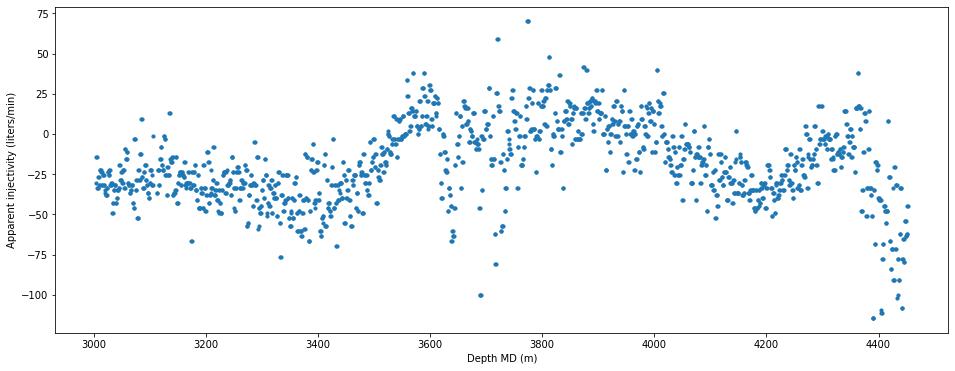

In [28]:
plt.figure(figsize=(16,6))
plt.scatter(injectivity["Depth corr"],injectivity["Apparent injectivity (liters/min)"],s=10)
plt.xlabel('Depth MD (m)')
plt.ylabel('Apparent injectivity (liters/min)')
plt.show()

## Merge

In [29]:
data = pd.merge(drilling,GR,how='left',left_on='Bit depth (m)', right_on='Depth MD (m)')

In [30]:
data = pd.merge(data,injectivity,how='left',left_on='Bit depth (m)', right_on='Depth corr')

In [31]:
data.dropna(inplace=True)

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2279 entries, 4 to 31888
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Bit depth (m)                      2279 non-null   float64
 1   Total RPM                          2279 non-null   float64
 2   Hook height (m)                    2279 non-null   float64
 3   Torque on bit (lbf.ft)             2279 non-null   float64
 4   Tension (klbf)                     2279 non-null   float64
 5   Motor RPM                          2279 non-null   float64
 6   Mud flow (l/mn)                    2279 non-null   float64
 7   SPP (psi)                          2279 non-null   float64
 8   RPM top (rpm)                      2279 non-null   float64
 9   Surface Torque (lbf.ft)            2279 non-null   float64
 10  ROP (m/h)                          2279 non-null   float64
 11  WOB (klbf)                         2279 non-null   floa

In [33]:
data.drop(["Depth MD (m)","Depth corr"],axis=1,inplace=True)

## Exploration

In [34]:
data["Bit depth (m)"].value_counts()

3484.0    12
3249.0    10
3233.8     9
3218.0     9
3251.8     8
          ..
4178.2     1
3889.2     1
3923.8     1
3805.0     1
4233.8     1
Name: Bit depth (m), Length: 878, dtype: int64

In [35]:
len(data["Bit depth (m)"].unique())

878

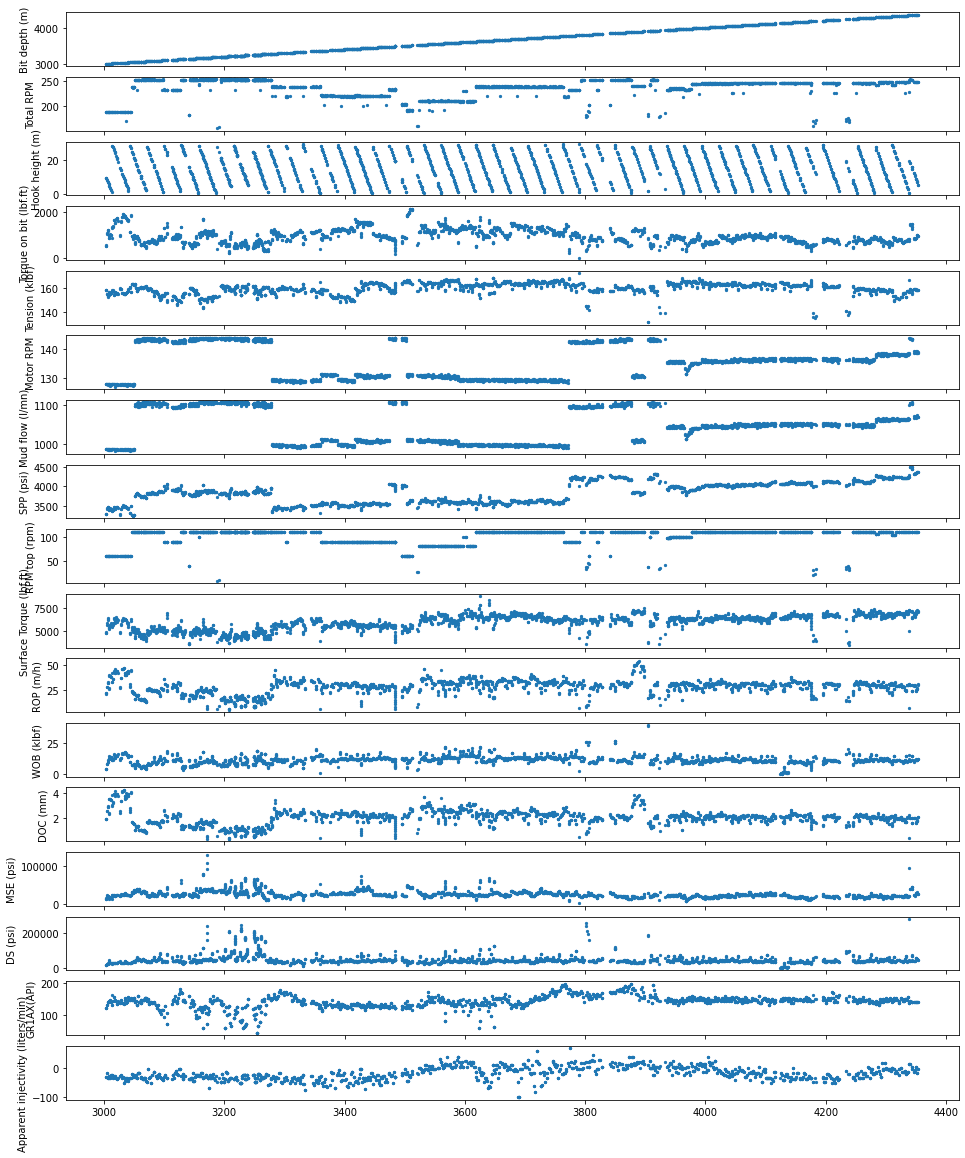

In [36]:
fig,ax = plt.subplots(len(data.columns),1,sharex=True,figsize=(16,20))

for i in range(len(list(data.columns))):
    ax[i].scatter(data["Bit depth (m)"],data[list(data.columns)[i]],s=5)
    ax[i].set_ylabel(list(data.columns)[i])

plt.show()

In [37]:
#sns.pairplot(data)
#plt.show()

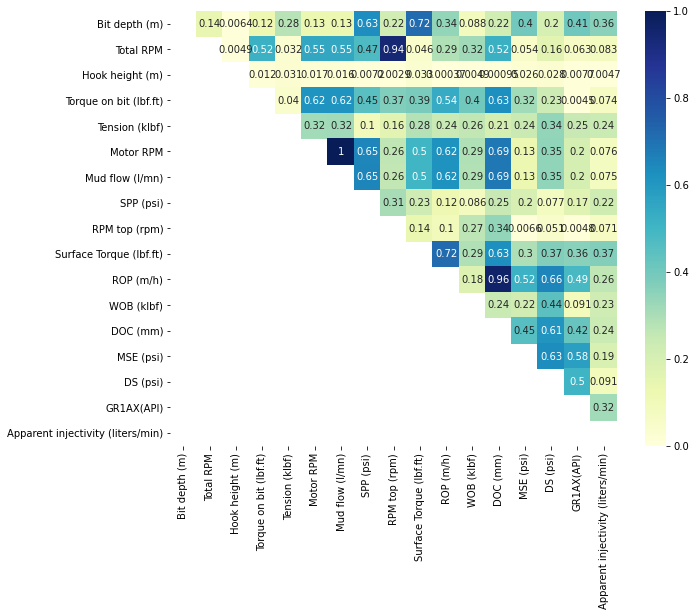

In [38]:
upper = data.corr().abs().where(np.triu(np.ones(data.corr().abs().shape),k=1).astype(bool))
plt.figure(figsize=(10,8))
sns.heatmap(upper,annot=True,cmap="YlGnBu",vmin=0,vmax=1)
plt.show()

## Transformation

In [39]:
from sklearn.feature_selection import VarianceThreshold

In [40]:
data.var(axis=0).sort_values(ascending=False)

DS (psi)                             8.906167e+08
MSE (psi)                            9.297892e+07
Surface Torque (lbf.ft)              7.401970e+05
Bit depth (m)                        1.525255e+05
Torque on bit (lbf.ft)               9.906777e+04
SPP (psi)                            6.487313e+04
Mud flow (l/mn)                      1.884779e+03
GR1AX(API)                           5.125798e+02
Apparent injectivity (liters/min)    5.078884e+02
Total RPM                            3.139497e+02
RPM top (rpm)                        2.309316e+02
Hook height (m)                      6.876949e+01
ROP (m/h)                            5.839001e+01
Motor RPM                            3.190764e+01
Tension (klbf)                       2.196717e+01
WOB (klbf)                           1.034594e+01
DOC (mm)                             3.696032e-01
dtype: float64

Keep ROP instead of DOC as variance is better.

Drop non-useful, high correlation and low variance columns.

In [41]:
data_analysis = data.drop(["Bit depth (m)","Hook height (m)","Motor RPM","RPM top (rpm)","DOC (mm)"],axis=1)
data_analysis

,Total RPM,Torque on bit (lbf.ft),Tension (klbf),Mud flow (l/mn),SPP (psi),Surface Torque (lbf.ft),ROP (m/h),WOB (klbf),MSE (psi),DS (psi),GR1AX(API),Apparent injectivity (liters/min)
4,188.138,511.50416,158.599,985.680,3289.976,4860.051,21.423,4.013,14424.276731,15913.898535,121.3,-30.21
5,188.138,529.84220,158.624,985.680,3297.894,4750.049,21.719,4.013,14737.773694,15697.014057,121.3,-30.21
6,188.138,553.82183,158.519,985.680,3296.394,4694.049,22.015,4.067,15197.653689,15694.345006,121.3,-30.21
45,188.069,1032.67524,155.125,985.147,3429.188,5809.260,28.380,8.016,21974.410284,23986.877796,130.6,-14.31
46,188.138,1074.08520,154.855,985.680,3441.779,5610.058,28.526,8.283,22746.941880,24668.031610,130.6,-14.31
...,...,...,...,...,...,...,...,...,...,...,...,...
31826,249.394,997.43541,158.188,1072.260,4368.399,7033.406,26.881,11.682,29714.881492,48940.564204,141.2,-14.31
31827,248.528,997.38945,158.045,1068.264,4370.026,6996.073,26.420,11.734,30127.002411,49842.496305,141.2,-14.31
31828,248.528,1015.25640,158.141,1068.797,4369.908,7265.276,26.542,11.706,30525.729850,49495.006962,141.2,-14.31
31887,248.528,979.46122,158.244,1068.264,4360.349,7162.074,30.801,12.441,25377.357291,45329.088703,141.2,-1.59


## Train test split

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
train, test = train_test_split(data_analysis,train_size = 0.8)

X_train = train.drop(["Apparent injectivity (liters/min)"],axis=1)
y_train = train["Apparent injectivity (liters/min)"]

X_test = test.drop(["Apparent injectivity (liters/min)"],axis=1)
y_test = test["Apparent injectivity (liters/min)"]

## Preprocessing

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
transformer = MinMaxScaler()

transformer.fit(X_train)

X_train_scaled = transformer.transform(X_train)

## Regression modelling shortlist

In [46]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [47]:
shortlist_model = [DecisionTreeRegressor(),LinearRegression(),KNeighborsRegressor(),SVR(),RandomForestRegressor(),
                   SGDRegressor(),Ridge(),GaussianProcessRegressor(),GradientBoostingRegressor()]

X_test_scaled = transformer.transform(X_test)

for i in range(len(shortlist_model)):
    model = shortlist_model[i]
    model.fit(X_train_scaled,y_train)
    print(shortlist_model[i])
    print('   train score: ',model.score(X_train_scaled,y_train))
    print('   test score: ', model.score(X_test_scaled,y_test))

DecisionTreeRegressor()
   train score:  1.0
   test score:  0.5977728001991698
LinearRegression()
   train score:  0.31704776804866974
   test score:  0.3312257877914285
KNeighborsRegressor()
   train score:  0.7989645582997934
   test score:  0.7034429004702163
SVR()
   train score:  0.3172410487210313
   test score:  0.30440677585186815
RandomForestRegressor()
   train score:  0.9629953385784564
   test score:  0.7490378845182601
SGDRegressor()
   train score:  0.26746922374122684
   test score:  0.27087899171851915
Ridge()
   train score:  0.312836144840415
   test score:  0.32077884293978265
GaussianProcessRegressor()
   train score:  0.9618612708102041
   test score:  -673.4286362819505
GradientBoostingRegressor()
   train score:  0.7142810448745187
   test score:  0.5880492213158822


 Better to keep columns from which MSE, DS and DOC where calculated.
 
 Score for each model is the coefficient of determination R^2 of the prediction.
 
 Our problem is definitely not a linear regression
 
 Three promising model:
     - KNN regressor
     - RandomForest regressor
     - GradientBoostingRegressor

### Feature importance RandomForest

In [48]:
model_RF = RandomForestRegressor()

model_RF.fit(X_train_scaled,y_train)

model_RF.feature_importances_

array([0.08595654, 0.0440432 , 0.08932193, 0.04091601, 0.22971464,
       0.20598586, 0.0494424 , 0.04876503, 0.05585988, 0.04914072,
       0.1008538 ])

In [49]:
pd.DataFrame(model_RF.feature_importances_, index=X_train.columns,
             columns=["feature importance"]).sort_values(["feature importance"],ascending=False)

,feature importance
SPP (psi),0.229715
Surface Torque (lbf.ft),0.205986
GR1AX(API),0.100854
Tension (klbf),0.089322
Total RPM,0.085957
MSE (psi),0.055860
ROP (m/h),0.049442
DS (psi),0.049141
WOB (klbf),0.048765
Torque on bit (lbf.ft),0.044043


### Feature selection ANOVA test

In [50]:
from sklearn.feature_selection import SelectKBest, f_regression

In [51]:
ANOVA = f_regression(X_train_scaled,y_train)
ANOVA

(array([ 15.86218469,  12.08782146, 111.79227416,  11.37662762,
         92.38070914, 277.35677406, 133.70028997,  99.29094585,
         66.03480788,  14.55246456, 196.3413737 ]),
 array([7.08068322e-05, 5.19433898e-04, 2.12526435e-25, 7.59319315e-04,
        2.27666498e-21, 4.47373228e-58, 6.83466478e-30, 8.26438708e-23,
        8.09072368e-16, 1.40857098e-04, 1.93193766e-42]))

In [52]:
pd.DataFrame([ANOVA[0],ANOVA[1]],columns=X_train.columns,
             index=["F-stat","f_value"]).T.sort_values(by="F-stat",ascending=False)

,F-stat,f_value
Surface Torque (lbf.ft),277.356774,4.473732e-58
GR1AX(API),196.341374,1.931938e-42
ROP (m/h),133.700290,6.834665e-30
Tension (klbf),111.792274,2.125264e-25
WOB (klbf),99.290946,8.264387e-23
SPP (psi),92.380709,2.276665e-21
MSE (psi),66.034808,8.090724e-16
Total RPM,15.862185,7.080683e-05
DS (psi),14.552465,1.408571e-04
Torque on bit (lbf.ft),12.087821,5.194339e-04


Features importance slightly different from RandomForest. The three less important are the same.

### RFECV

In [53]:
from sklearn.feature_selection import RFECV

In [54]:
selector = RFECV(RandomForestRegressor(), step=1, min_features_to_select=2, cv=5,n_jobs=3)

selector.fit(X_train_scaled,y_train)

RFECV(cv=5, estimator=RandomForestRegressor(), min_features_to_select=2,
      n_jobs=3)

In [55]:
selector.ranking_

array([1, 2, 1, 4, 1, 1, 1, 3, 1, 1, 1])

In [56]:
pd.DataFrame(selector.ranking_, index=X_train.columns,
             columns=["feature importance"]).sort_values(["feature importance"])

,feature importance
Total RPM,1
Tension (klbf),1
SPP (psi),1
Surface Torque (lbf.ft),1
ROP (m/h),1
MSE (psi),1
DS (psi),1
GR1AX(API),1
Torque on bit (lbf.ft),2
WOB (klbf),3


In [57]:
selector.grid_scores_

array([0.41520808, 0.54832316, 0.67175293, 0.67499693, 0.70033588,
       0.70450548, 0.71449823, 0.70627877, 0.71029499, 0.70676103])

In [58]:
pd.DataFrame(selector.get_support(), index=X_train.columns,
             columns=["feature importance"]).sort_values(["feature importance"],ascending=False)

,feature importance
Total RPM,True
Tension (klbf),True
SPP (psi),True
Surface Torque (lbf.ft),True
ROP (m/h),True
MSE (psi),True
DS (psi),True
GR1AX(API),True
Torque on bit (lbf.ft),False
Mud flow (l/mn),False


The below columns will be dropped:

- Mud flow (l/mn) is already included in Total RPM
- DS (psi) or WOB (klbf) can be drop as they are redundant
- Torque on bit (lbs.ft) is used for MSE calculation

In [59]:
X_train.drop(["Mud flow (l/mn)","WOB (klbf)","Torque on bit (lbf.ft)"],axis=1, inplace=True)
X_test.drop(["Mud flow (l/mn)","WOB (klbf)","Torque on bit (lbf.ft)"],axis=1, inplace=True)

X_train_scaled = transformer.fit_transform(X_train)
X_test_scaled = transformer.transform(X_test)

## Test binarize labels

## Fine-tuning

### Fine-tune RandomForest

In [60]:
from sklearn.model_selection import RandomizedSearchCV

import time

In [61]:
start_time = time.time()

model_RF_tuned = RandomizedSearchCV(RandomForestRegressor(),
                                    param_distributions={"n_estimators":range(500),
#                                                       "max_depth":range(len(X_train.columns)),"min_samples_split": range(200)
                                                        },
                                    n_iter=30,n_jobs=3,cv=5)

model_RF_tuned.fit(X_train_scaled,y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 79.55636310577393 seconds ---


In [62]:
model_RF_tuned.best_estimator_

RandomForestRegressor(n_estimators=367)

In [63]:
model_RF_tuned.best_score_

0.7229111608881484

In [64]:
model_RF_tuned.best_estimator_.score(X_test_scaled,y_test)

0.7625893535472511

Limiting max depth and min samples reduce the score of the model.

### Fine-tune KNN

In [65]:
start_time = time.time()

model_KNN_tuned = RandomizedSearchCV(KNeighborsRegressor(),
                                    param_distributions={"n_neighbors":range(200),
                                                        "weights":['uniform','distance']},
                                    n_iter=100,n_jobs=3,cv=5)

model_KNN_tuned.fit(X_train_scaled,y_train)

print("--- %s seconds ---" % (time.time() - start_time))

--- 1.9876971244812012 seconds ---


In [66]:
model_KNN_tuned.best_estimator_

KNeighborsRegressor(n_neighbors=2, weights='distance')

In [67]:
model_KNN_tuned.best_score_

0.7713367781652373

In [68]:
model_KNN_tuned.best_estimator_.score(X_test_scaled,y_test)

0.8365070907787605

### Fine-tune GradientBoosting

In [69]:
start_time = time.time()

model_GB_tuned = RandomizedSearchCV(GradientBoostingRegressor(),
                                    param_distributions={"n_estimators":range(500),
                                                        "min_samples_leaf":range(200),
                                                        "max_depth":range(len(X_train.columns)-1)},
                                    n_iter=60,n_jobs=3,cv=5)

model_GB_tuned.fit(X_train_scaled,y_train)

print('train score: ',model_GB_tuned.score(X_train_scaled,y_train))
print('test score: ',model_GB_tuned.score(X_test_scaled,y_test))

print("--- %s seconds ---" % (time.time() - start_time))

train score:  0.9563589905968561
test score:  0.752342290408485
--- 52.79583215713501 seconds ---


In [70]:
model_GB_tuned.best_estimator_

GradientBoostingRegressor(max_depth=5, min_samples_leaf=11, n_estimators=282)

Gradient boosting tends to overfit. May be try to do some bagging with it

## Ensemble methods

### Bagging

In [71]:
from sklearn.ensemble import BaggingRegressor

In [72]:
model_bagg = BaggingRegressor(base_estimator=model_GB_tuned.best_estimator_,
                             n_estimators=100, n_jobs=3)

model_bagg.fit(X_train_scaled,y_train)

print('train score: ',model_bagg.score(X_train_scaled,y_train))
print('test score: ',model_bagg.score(X_test_scaled,y_test))

train score:  0.905665139843592
test score:  0.7185832874094107


In [73]:
model_bagg = BaggingRegressor(base_estimator=GradientBoostingRegressor(),
                             n_estimators=100, n_jobs=3)

model_bagg.fit(X_train_scaled,y_train)

print('train score: ',model_bagg.score(X_train_scaled,y_train))
print('test score: ',model_bagg.score(X_test_scaled,y_test))

train score:  0.6967280412578102
test score:  0.5758936045282612


Bagging the fine-tuned GradientBoosting has a good effect ?

### Voting Regressor

In [74]:
from sklearn.ensemble import VotingRegressor

model_vote = VotingRegressor([("KNN",model_KNN_tuned.best_estimator_),
                              ("RF", model_RF_tuned.best_estimator_),
                             ("GB",model_GB_tuned.best_estimator_)])

model_vote.fit(X_train_scaled,y_train)

print('train score: ',model_vote.score(X_train_scaled,y_train))
print('test score: ',model_vote.score(X_test_scaled,y_test))

train score:  0.9844456334727801
test score:  0.8272867337148629


In [75]:
model_vote = VotingRegressor([("KNN",model_KNN_tuned.best_estimator_),
                              ("RF", model_RF_tuned.best_estimator_),
                             ("GB",model_bagg)])

model_vote.fit(X_train_scaled,y_train)

print('train score: ',model_vote.score(X_train_scaled,y_train))
print('test score: ',model_vote.score(X_test_scaled,y_test))

train score:  0.9427726188735319
test score:  0.7875880011505577


### Stacking

In [76]:
from sklearn.ensemble import StackingRegressor

In [77]:
model_stack = StackingRegressor([("KNN",model_KNN_tuned.best_estimator_),
                              ("RF", model_RF_tuned.best_estimator_),
                                ("GB",model_GB_tuned.best_estimator_)],
                               final_estimator=model_vote,
                               cv=5,n_jobs=3)

model_stack.fit(X_train_scaled,y_train)

print('train score: ',model_stack.score(X_train_scaled,y_train))
print('test score: ',model_stack.score(X_test_scaled,y_test))

train score:  0.982229327411216
test score:  0.8385912093633294


In [78]:
model_stack = StackingRegressor([("KNN",model_KNN_tuned.best_estimator_),
                              ("RF", model_RF_tuned.best_estimator_),
                                ("GB",model_GB_tuned.best_estimator_)],
                               cv=5,n_jobs=3)

model_stack.fit(X_train_scaled,y_train)

print('train score: ',model_stack.score(X_train_scaled,y_train))
print('test score: ',model_stack.score(X_test_scaled,y_test))

train score:  0.9951363443461024
test score:  0.851236308329228


Default final estimator RidgeCV is best

## Final models

- model_vote = VotingRegressor([("KNN",model_KNN_tuned.best_estimator_),
                              ("RF", model_RF_tuned.best_estimator_),
                             ("GB",model_GB_tuned.best_estimator_)])
                             
- model_stack = StackingRegressor([("KNN",model_KNN_tuned.best_estimator_),
                              ("RF", model_RF_tuned.best_estimator_),
                                ("GB",model_GB_tuned.best_estimator_)],
                               cv=5,n_jobs=3)

### Learning curve

In [79]:
from sklearn.model_selection import learning_curve

In [127]:
start_time = time.time()

N, train_score, val_score = learning_curve(model_stack,X_train_scaled,y_train,
                                           train_sizes=np.linspace(0.1,1.0,10), n_jobs=3)

print("--- %s seconds ---" % (time.time() - start_time))

--- 138.95643401145935 seconds ---


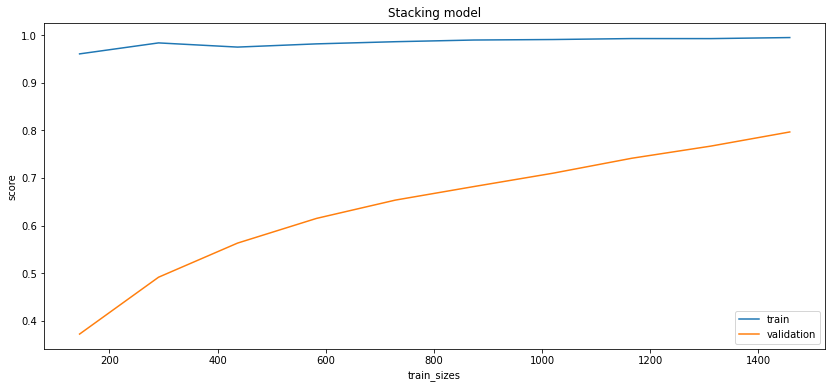

In [130]:
plt.figure(figsize=(14,6))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title('Stacking model')
plt.legend()
plt.show()

In [82]:
start_time = time.time()

N, train_score, val_score = learning_curve(model_vote,X_train_scaled,y_train,
                                           train_sizes=np.linspace(0.1,1.0,10), n_jobs=3)

print("--- %s seconds ---" % (time.time() - start_time))

--- 136.34068703651428 seconds ---


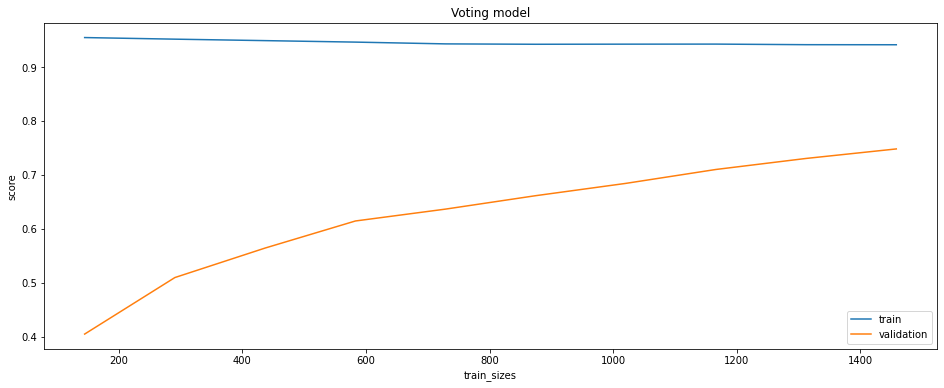

In [83]:
plt.figure(figsize=(14,6))
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.ylabel('score')
plt.title('Voting model')
plt.legend()
plt.show()

- Best model = model with the highest score on test
- Need more samples to enhance validation
- Transform non normal distribution variable into normal distribution can enhance model performance

### Predictions

In [117]:
prediction_stack = pd.DataFrame(model_stack.predict(X_test_scaled),
                                index=X_test.index,columns=["Stack model predictions"])

prediction_stack = pd.merge(data[["Bit depth (m)","Apparent injectivity (liters/min)"]],
                            prediction_stack,how='right',left_index=True,right_index=True)

prediction_stack = prediction_stack.sort_values(by="Bit depth (m)")

prediction_stack

,Bit depth (m),Apparent injectivity (liters/min),Stack model predictions
79,3007.0,-33.39,-33.841244
99,3007.8,-33.39,-31.193964
126,3009.2,-27.03,-27.047787
223,3014.2,-23.85,-27.749240
264,3016.4,-25.44,-31.855048
...,...,...,...
31652,4344.0,-1.59,4.006932
31741,4347.6,-4.77,-11.191675
31740,4347.6,-4.77,-15.805616
31788,4349.8,3.18,2.200159


In [105]:
prediction_KNN_CV = pd.DataFrame(model_KNN_tuned.predict(X_test_scaled),
                                index=X_test.index,columns=["KNN model CV predictions"])

prediction_KNN_CV = pd.merge(data[["Bit depth (m)","Apparent injectivity (liters/min)"]],
                            prediction_KNN_CV,how='right',left_index=True,right_index=True)

prediction_KNN_CV = prediction_KNN_CV.sort_values(by="Bit depth (m)")

prediction_KNN_CV

,Bit depth (m),Apparent injectivity (liters/min),KNN model CV predictions
79,3007.0,-33.39,-33.390000
99,3007.8,-33.39,-28.647287
126,3009.2,-27.03,-25.522699
223,3014.2,-23.85,-25.083712
264,3016.4,-25.44,-28.297671
...,...,...,...
31652,4344.0,-1.59,5.067022
31741,4347.6,-4.77,-12.720000
31740,4347.6,-4.77,-19.534725
31788,4349.8,3.18,3.180000


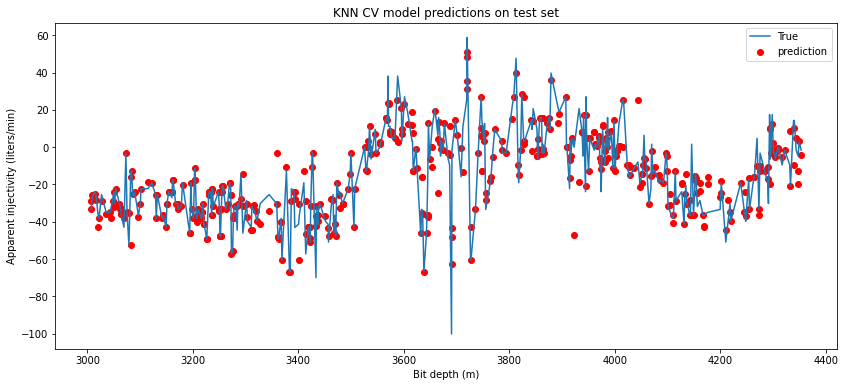

In [114]:
plt.figure(figsize=(14,6))
plt.scatter(prediction_KNN_CV["Bit depth (m)"],prediction_KNN_CV["KNN model CV predictions"],
            c='r',label="prediction")

plt.plot(prediction_KNN_CV["Bit depth (m)"],prediction_KNN_CV["Apparent injectivity (liters/min)"], label=True)
plt.xlabel('Bit depth (m)')
plt.ylabel("Apparent injectivity (liters/min)")
plt.title('KNN CV model predictions on test set')
plt.legend()
plt.show()

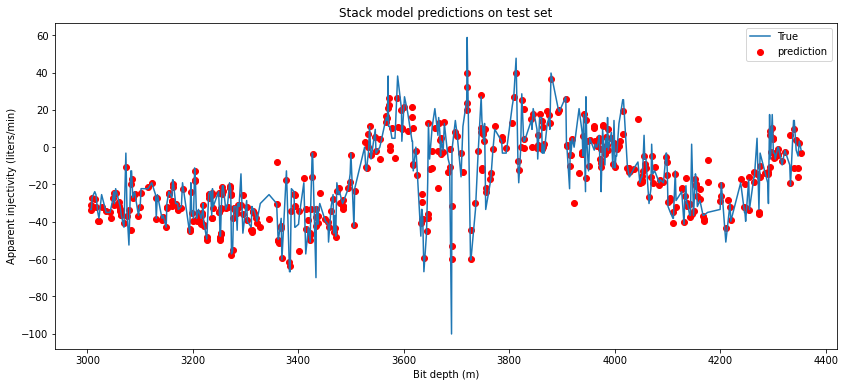

In [118]:
plt.figure(figsize=(14,6))
plt.scatter(prediction_stack["Bit depth (m)"],prediction_stack["Stack model predictions"],
            c='r',label="prediction")

plt.plot(prediction_stack["Bit depth (m)"],prediction_stack["Apparent injectivity (liters/min)"], label=True)
plt.xlabel('Bit depth (m)')
plt.ylabel("Apparent injectivity (liters/min)")
plt.title('Stack model predictions on test set')
plt.legend()
plt.show()